In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("Most Streamed Spotify Songs 2024.csv",encoding='ISO-8859-1')
data.head()


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}") 
print(duplicates)

Number of duplicate rows: 2
0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 4600, dtype: bool


In [7]:
data_cleaned = data.drop_duplicates()
data.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [8]:
null_values = data.isnull().sum().sum()
print(f"Total number of null values in the DataFrame: {null_values}")

Total number of null values in the DataFrame: 22800


In [12]:
data_cleaned = data.dropna()
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [15]:
data = pd.DataFrame({
    'Track': ['MILLION DOLLAR BABY', 'Not Like Us', 'i like the way you kiss me', 'Flowers', 'Houdini'],
    'Album Name': ['Million Dollar Baby - Single', 'Not Like Us', 'I like the way you kiss me', 'Flowers - Single', 'Houdini'],
    'Artist': ['Tommy Richman', 'Kendrick Lamar', 'Artemas', 'Miley Cyrus', 'Eminem'],
    'Release Date': ['4/26/2024', '5/4/2024', '3/19/2024', '1/12/2023', '5/31/2024'],
    'ISRC': ['QM24S2402528', 'USUG12400910', 'QZJ842400387', 'USSM12209777', 'USUG12403398'],
    'All Time Rank': [1, 2, 3, 4, 5],
    'Track Score': [725.4, 545.9, 538.4, 444.9, 423.3],
    'Spotify Streams': ['390,470,936', '323,703,884', '601,309,283', '2,031,280,633', '107,034,922'],
    'Spotify Playlist Count': [30716, 28113, 54331, 269802, 7223],
    'Spotify Playlist Reach': ['196,631,588', '174,597,137', '211,607,669', '136,569,078', '151,469,874'],
    'SiriusXM Spins': [684, 3, 536, 2182, 1],
    'Deezer Playlist Count': [62.0, 67.0, 136.0, 264.0, 82.0],
    'Deezer Playlist Reach': ['17,598,718', '10,422,430', '36,321,847', '24,684,248', '17,660,624'],
    'Amazon Playlist Count': [114.0, 111.0, 172.0, 210.0, 105.0],
    'Pandora Streams': ['18,004,655', '7,780,028', '5,022,621', '190,260,277', '4,493,884'],
    'Pandora Track Stations': [226931, 28644, 5639, 203384, 7006],
    'Soundcloud Streams': ['4,818,457', '6,623,075', '7,208,651', 'NaN', '207,179'],
    'Shazam Counts': ['2,669,262', '1,118,279', '5,285,340', '11,822,942', '457,017'],
    'TIDAL Popularity': ['NaN', 'NaN', 'NaN', 'NaN', 'NaN'],
    'Explicit Track': [0, 1, 0, 0, 1]
})


print(data)

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC  All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528              1        725.4     390,470,936   
1     5/4/2024  USUG12400910              2        545.9     323,703,884   
2    3/19/2024  QZJ842400387              3        538.4     601,309,283   
3    1/12/2023  USSM12209777              4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398              5        423.3     107,034,922   

   Spotify Playlist Count Spotify Playlist Reach  SiriusXM Spins  \


In [16]:
data_cleaned = data.dropna()

In [19]:
data_filled = data.fillna('Unknown')
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936",30716,"196,631,588",684,62.0,"17,598,718",114.0,"18,004,655",226931,"4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884",28113,"174,597,137",3,67.0,"10,422,430",111.0,"7,780,028",28644,"6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283",54331,"211,607,669",536,136.0,"36,321,847",172.0,"5,022,621",5639,"7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633",269802,"136,569,078",2182,264.0,"24,684,248",210.0,"190,260,277",203384,NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922",7223,"151,469,874",1,82.0,"17,660,624",105.0,"4,493,884",7006,"207,179","457,017",NaN,1


In [20]:
data['Release Date'] = pd.to_datetime(data['Release Date'])

In [22]:
data['Spotify Streams'] = data['Spotify Streams'].replace(',', '', regex=True).astype(float)
data['Spotify Playlist Reach'] = data['Spotify Playlist Reach'].replace(',', '', regex=True).astype(float)
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716,196631588.0,684,62.0,"17,598,718",114.0,"18,004,655",226931,"4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113,174597137.0,3,67.0,"10,422,430",111.0,"7,780,028",28644,"6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331,211607669.0,536,136.0,"36,321,847",172.0,"5,022,621",5639,"7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802,136569078.0,2182,264.0,"24,684,248",210.0,"190,260,277",203384,NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223,151469874.0,1,82.0,"17,660,624",105.0,"4,493,884",7006,"207,179","457,017",NaN,1


C:\Users\varun\AppData\Local\Temp\ipykernel_6540\4038173966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='Spotify Streams', y='Artist', palette='viridis')
C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get

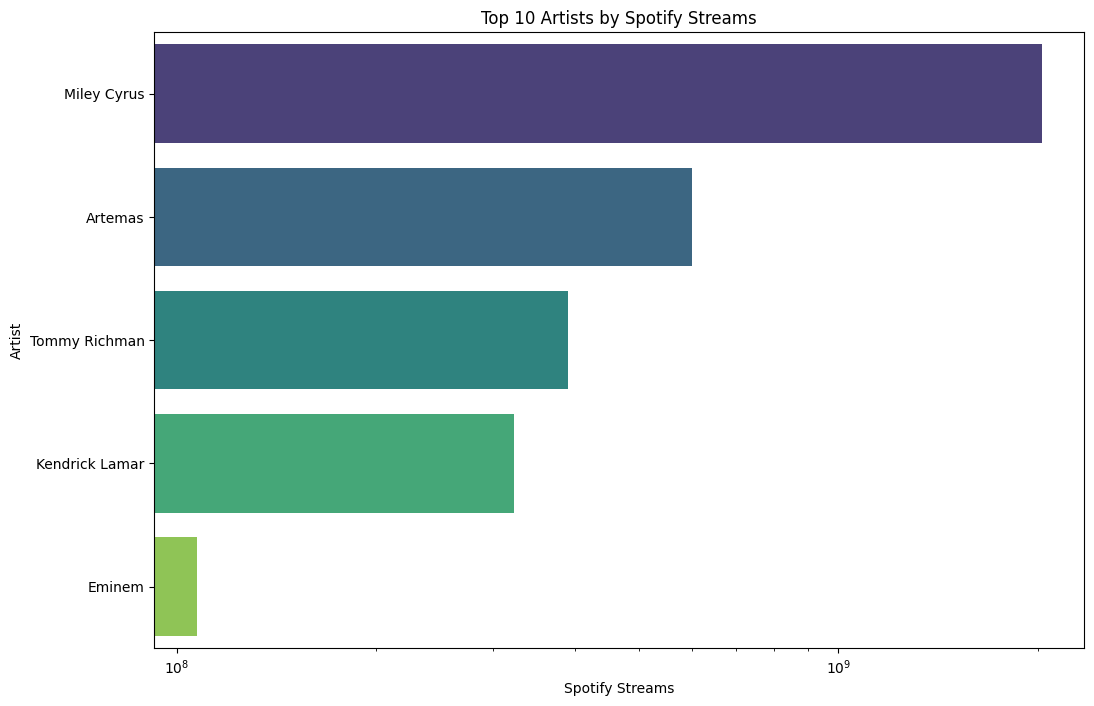

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 
top_artists = data.nlargest(10, 'Spotify Streams')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_artists, x='Spotify Streams', y='Artist', palette='viridis')
plt.title('Top 10 Artists by Spotify Streams')
plt.xlabel('Spotify Streams')
plt.ylabel('Artist')
plt.xscale('log')  # Optional: Use logarithmic scale if data varies greatly
plt.show()

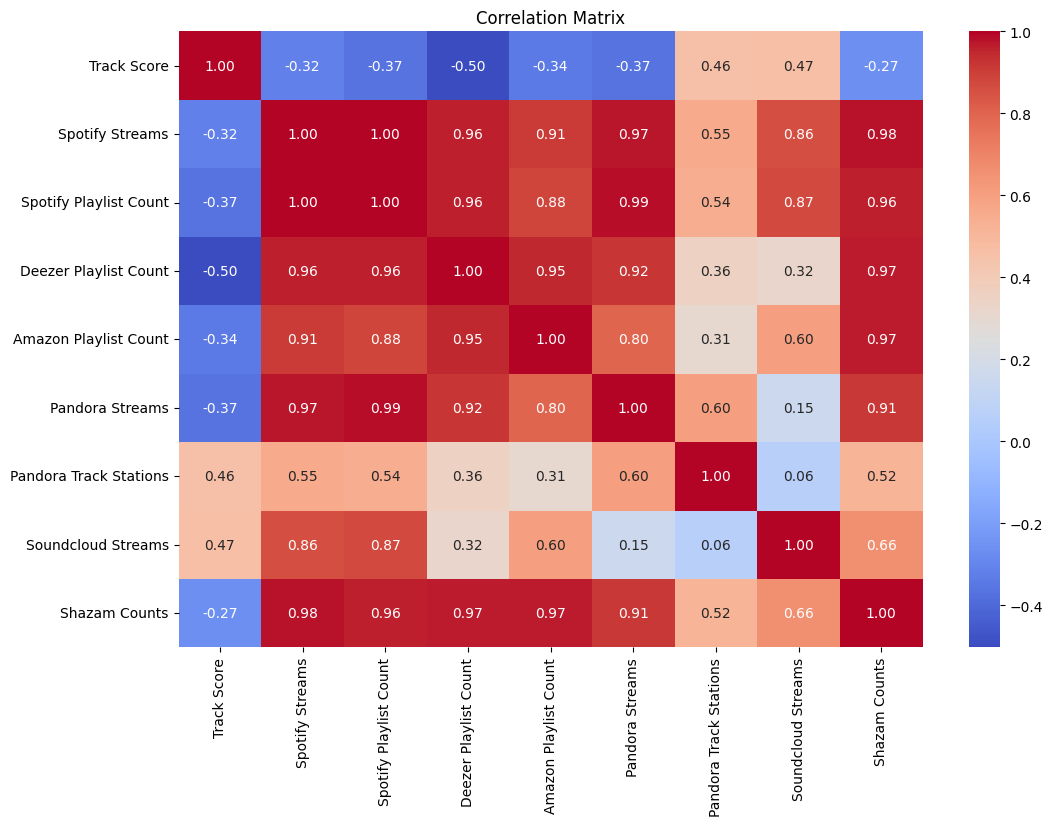

In [26]:
data_numeric = data[['Track Score', 'Spotify Streams', 'Spotify Playlist Count', 
                     'Deezer Playlist Count', 'Amazon Playlist Count', 
                     'Pandora Streams', 'Pandora Track Stations', 
                     'Soundcloud Streams', 'Shazam Counts']].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()